### This tutorial presents how to simulate the full network + body movement

## Step 1: Import necessary packages and modules

In [1]:
%matplotlib inline

# external packages 

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.animation as animation
import scipy.io as sio

# move directory to parent directory of main

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

# internal modules 

import dynworm as dw

## Step 2: Initialize neural parameters and connectivity
### Here we use the default neural parameters and connectomes

In [2]:
dw.network_sim.initialize_params_neural()
dw.network_sim.initialize_connectivity()

Using the default neural parameters
Using the default connectivity


## Step 3: Initialize body parameters
### Body parameters must be initialized prior to simulating the body.
### In this tutorial, we use the default body parameters

In [3]:
dw.body_sim.initialize_params_body()

Using the default body parameters


## Step 4: Initialize input_vec and ablation vector
### We simulate the network with constant input stimuli into PLML and PLMR

In [4]:
input_vec = np.zeros(dw.network_sim.params_obj_neural['N'])
ablation_mask = np.ones(dw.network_sim.params_obj_neural['N'], dtype = 'bool')

In [5]:
# Use dw.utils.neuron_names_2_inds to find the indices of the neurons

print(dw.utils.neuron_names_2_inds(['PLML']), dw.utils.neuron_names_2_inds(['PLMR']))

[278] [276]


In [6]:
# In this example, we are injecting 3.5nA constant current into PLMR (276th index) and PLML (278th index)

input_vec[276] = 3500
input_vec[278] = 3500

## Step 5: Run the simulation

In [7]:
result_dict_network = dw.network_sim.run_network_constinput(t_duration=10, 
                                                            input_vec = input_vec, ablation_mask=ablation_mask)

All neurons are healthy
Network integration prep completed...
Computing network dynamics...


C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:880: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth'])))))
C:\Users\Jimin\Dropbox\academic\Research\research_code\celegans_sim_api_v1_open\dynworm\network_sim.py:931: RuntimeWarning: overflow encountered in exp
  sigmoid_V = np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth']))))


11.0% completed
22.0% completed
33.0% completed
44.0% completed
56.0% completed
67.0% completed
78.0% completed
89.0% completed
100.0% completed


## Step 6: Simulate the body  
### Simply provide result_dict_network to  dynworm.body_sim.solve_bodymodel function. 
### The function also accepts following parameters:
### xinit: Initial x_coordinate of the worm's head. Set to 0 by default.
### yinit: Initial y_coordinate of the worm's head. Set to 0 by default.
### orientation_angle: 
### i) positive orientation angle --> counterclockwise rotation
### ii) negative orientation angle --> clockwise rotation. Set to 0 by default.

Computing body movements...
11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.8% completed
100.0% completed
Post-processing the simulated body...
Rendering simulated body movements...


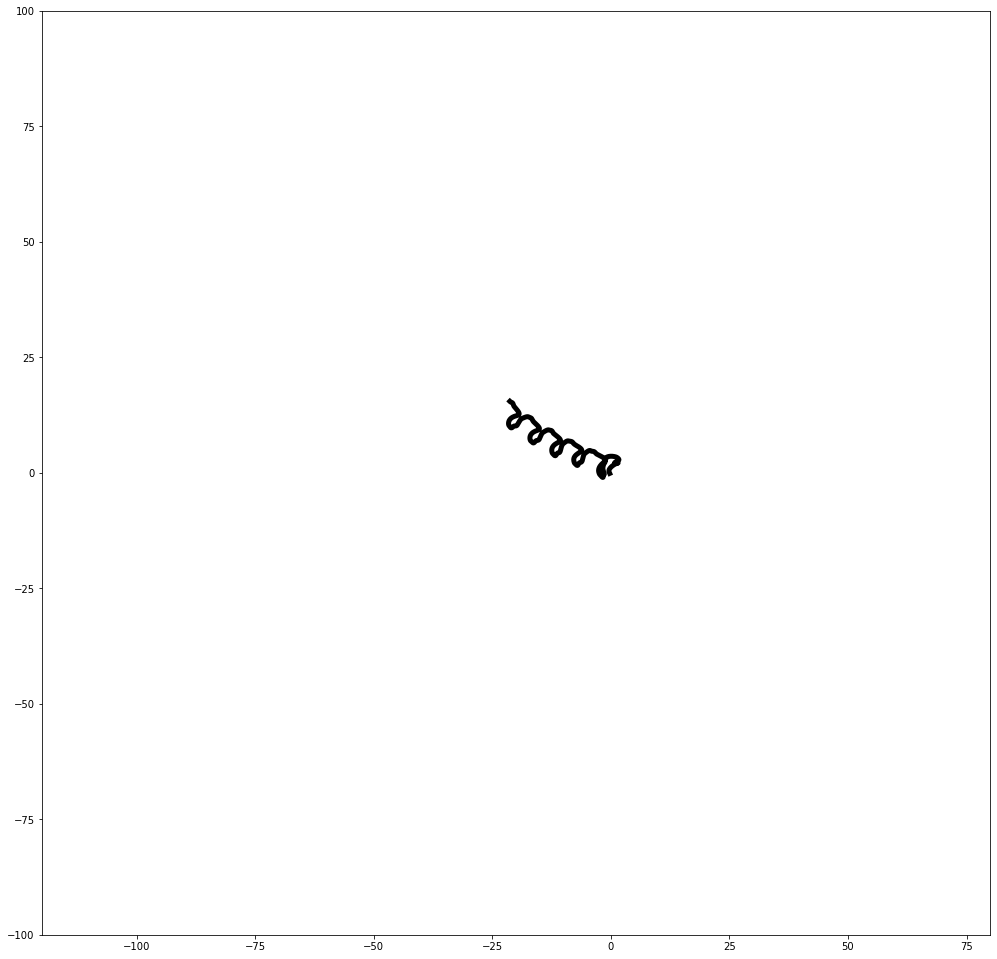

In [9]:
result_dict_body = dw.body_sim.solve_bodymodel(result_dict_network = result_dict_network) 

### The function outputs result_dict_body, a dictionary object containing 
### "t": time vector for simulation
### "x": x coordinates for 193 body segments of shape (timepoints x body segments). 
### "y": y coordinates for 193 body segments of shape (timepoints x body segments).
### "phi": dynamics of angles of 24 rod segments relative to horizontal plane
### The segments are ordered from anterior to posterior direction 

In [ ]:
result_dict_body['x'].shape

In [ ]:
x = result_dict_body['x']
y = result_dict_body['y']

## Step 7: Produce body movement animation
### Use dynworm.body_sim.produce_animation to animate the simulated body movements
### Note that you need to install 'ffmpeg' package to compile the video. You can simply use "conda install" command in Anaconda prompt to include in Anaconda environment. 

### The function has following base parameters
### x: x coordinates array with shape (timesteps, 193)
### y: y coordinates array with shape (timesteps, 193)
### filename: filename to be saved
### xmin: leftmost x coordinate for the video
### xmax: rightmost x coordinate for the video
### ymin: downmost y coordinate for the video
### ymax: upmost y coordinate for the video
### figsize_x: width of video
### figsize_y: height of video 

In [ ]:
# For producing body animation, ensure that filename is in string format

dw.body_sim.produce_animation(x=x, y=y, filename='plm_3.5nA', 
                              xmin=-50, xmax=50, ymin=-50, ymax=50, 
                              figsize_x=25, figsize_y=25, axis = 'off', fps = 100)